<a href="https://colab.research.google.com/github/Arup3201/Breast-Cancer-Prediction-Tensorflow/blob/main/breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [15]:
np.set_printoptions(precision=3, suppress=True)

In [2]:
# Upload the kaggle.json file then run this cell
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 33.8MB/s]


In [3]:
!mkdir ./breast-cancer-dataset
!unzip -q breast-cancer-wisconsin-data.zip -d ./breast-cancer-dataset
!rm breast-cancer-wisconsin-data.zip

mkdir: cannot create directory ‘./breast-cancer-dataset’: File exists
replace ./breast-cancer-dataset/data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [4]:
data = pd.read_csv("breast-cancer-dataset/data.csv")

In [33]:
df = data.copy()

In [34]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [36]:
df = df.drop(columns=['id', 'Unnamed: 32'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [37]:
cancer_features = df.copy()
cancer_labels = cancer_features.pop('diagnosis')

In [38]:
cancer_features = np.array(cancer_features)
cancer_features

array([[ 17.99 ,  10.38 , 122.8  , ...,   0.265,   0.46 ,   0.119],
       [ 20.57 ,  17.77 , 132.9  , ...,   0.186,   0.275,   0.089],
       [ 19.69 ,  21.25 , 130.   , ...,   0.243,   0.361,   0.088],
       ...,
       [ 16.6  ,  28.08 , 108.3  , ...,   0.142,   0.222,   0.078],
       [ 20.6  ,  29.33 , 140.1  , ...,   0.265,   0.409,   0.124],
       [  7.76 ,  24.54 ,  47.92 , ...,   0.   ,   0.287,   0.07 ]])

In [48]:
cancer_features.shape

(569, 30)

In [39]:
cancer_labels

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [47]:
cancer_labels = cancer_labels.replace({'M': 1, 'B': 0})

In [49]:
model = Sequential([
    layers.Normalization(input_shape=(30, )),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

In [50]:
model.compile(optimizer='adam',
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [51]:
epochs = 15
history = model.fit(x=cancer_features,
                    y=cancer_labels,
                    epochs=epochs)

Epoch 1/15
18/18 [==============================] - 1s 2ms/step - loss: 16.6524 - accuracy: 0.6186
Epoch 2/15
18/18 [==============================] - 0s 2ms/step - loss: 2.5921 - accuracy: 0.6924
Epoch 3/15
18/18 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.8998
Epoch 4/15
18/18 [==============================] - 0s 2ms/step - loss: 0.3569 - accuracy: 0.9104
Epoch 5/15
18/18 [==============================] - 0s 2ms/step - loss: 0.3379 - accuracy: 0.9174
Epoch 6/15
18/18 [==============================] - 0s 2ms/step - loss: 0.2847 - accuracy: 0.9227
Epoch 7/15
18/18 [==============================] - 0s 2ms/step - loss: 0.2688 - accuracy: 0.9315
Epoch 8/15
18/18 [==============================] - 0s 2ms/step - loss: 0.2678 - accuracy: 0.9209
Epoch 9/15
18/18 [==============================] - 0s 2ms/step - loss: 0.2656 - accuracy: 0.9262
Epoch 10/15
18/18 [==============================] - 0s 2ms/step - loss: 0.2606 - accuracy: 0.9227
Epoch 11/15
18/18 

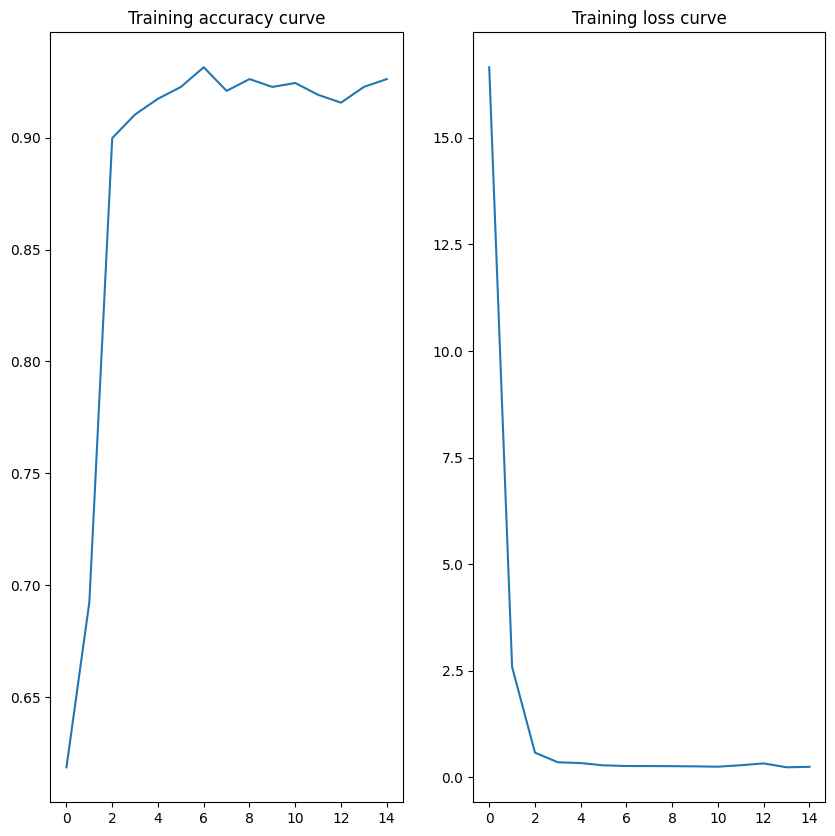

In [52]:
plt.figure(figsize=(10, 10))

epochs_range = range(epochs)

acc = history.history['accuracy']
loss = history.history['loss']

ax = plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc)
plt.title("Training accuracy curve")

ax = plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss)
plt.title("Training loss curve")

plt.show()